<a href="https://colab.research.google.com/github/NayakAbhishek/NayakAbhishek/blob/main/CAPM%20USING%20PYTHON%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capital Asset Pricing Model (CAPM) with Python.

This notebook is devoted to exploring some aspects of the Capital Asset Pricing Model (CAPM) using Python. According to CAPM, the expected return of a particular investment $E[r_{a}]$ is given the following equation:
$$
E[r_{a}] = r_{f} + \beta_{a}(E[r_{m}]-r_{f})\,,
$$
where $r_{f}$ is the a risk free return (like goverment bond returns), $E[r_{m}]$ is the expected return from the market, usually measured by the return on some index like S&P 500, and $\beta_{a}$ measures the volatility of the investement with respect to the market, and is formally given by:
$$
\beta_{a} = \frac{\text{Cov}(r_{a},r_{m})}{\text{Var}(r_{m})}\,.
$$
Thus, the model assumes a linear relationship between $E[r_{a}]$ and the quantity $(E[r_{m}]-r_{f})$, also called as the market premium, which is mediated by the coefficient $\beta_{a}$. If we would like to measure all the returns in the model with respect to the risk free rate $r_{f}$ and thus construct a linear regression between the quantities $(E[r_{a}]-r_{f})$ and the market premium $(E[r_{a}]-r_{f})$, one must the pose this relationship as:
$$
(E[r_{a}]-r_{f}) = \alpha + \beta_{a}(E[r_{m}]-r_{f})\,.
$$
In this manner, $\alpha$ meassures the difference between the expected return $E[r_{a}]$ as measured in real life, and the expected return of our investment as given by the CAPM:
$$
\alpha = E[r_{a}] - \left( r_{f} +\beta_{a}(E[r_{m}]-r_{f})\right)\,.
$$
Let us explore this using Python.

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
#yf.pdr_override()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

We will use ^GSPC to compute $E[r_{m}]$ and set $r_f = 0$, for simplicity. Let us then apply the CAPM to apple stocks. To capture less noise in our construction, we will focus on monthly returns.

#Library Deprecated pdr

#Updated Code

In [23]:
import pandas as pd
import yfinance as yf

# Define the stocks and date range
stock_a = 'AAPL'
stock_m = '^GSPC'

start = '2015-01-01'
end = '2018-01-01'

# Retrieve the data
data_a = yf.download(stock_a, start=start, end=end)['Adj Close']
data_m = yf.download(stock_m, start=start, end=end)['Adj Close']

# Display the first few rows of the data
data_a.head(), data_m.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(Date
 2015-01-02    24.373959
 2015-01-05    23.687302
 2015-01-06    23.689533
 2015-01-07    24.021715
 2015-01-08    24.944685
 Name: Adj Close, dtype: float64,
 Date
 2015-01-02    2058.199951
 2015-01-05    2020.579956
 2015-01-06    2002.609985
 2015-01-07    2025.900024
 2015-01-08    2062.139893
 Name: Adj Close, dtype: float64)

In [40]:
data_a.head()

,Adj Close
Date,
2015-01-02,24.373959
2015-01-05,23.687302
2015-01-06,23.689533
2015-01-07,24.021715
2015-01-08,24.944685


We focus now on monthly returns:

In [41]:
M_stock_a = data_a.resample('M').last()
M_stock_m = data_m.resample('M').last()

data = pd.DataFrame({'Inv_Close':M_stock_a, 'Markt_Close': M_stock_m})
data.tail()

<ipython-input-41-9732574e7f46>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  M_stock_a = data_a.resample('M').last()
<ipython-input-41-9732574e7f46>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  M_stock_m = data_m.resample('M').last()


,Inv_Close,Markt_Close
Date,,
2017-08-31,38.485271,2471.649902
2017-09-30,36.166763,2519.360107
2017-10-31,39.667988,2575.260010
2017-11-30,40.472378,2647.580078
2017-12-31,39.855331,2673.610107


from matplotlib import pyplot as plt
_df_18['Inv_Close'].plot(kind='hist', bins=20, title='Inv_Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Markt_Close'].plot(kind='hist', bins=20, title='Markt_Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Inv_Close', y='Markt_Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Markt_Close']
  ys = series['Inv_Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('Markt_Close', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Markt_Close')
_ = plt.ylabel('Inv_Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Markt_Close']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Markt_Close'}, axis=1)
              .sort_values('Markt_Close', ascending=True))
  xs = counted['Markt_Close']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('Markt_Close', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Markt_Close')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_23['Inv_Close'].plot(kind='line', figsize=(8, 4), title='Inv_Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['Markt_Close'].plot(kind='line', figsize=(8, 4), title='Markt_Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
data

,Inv_Close,Markt_Close
Date,,
2015-01-31,26.119574,1994.989990
2015-02-28,28.751818,2104.500000
2015-03-31,27.849821,2067.889893
2015-04-30,28.010967,2085.510010
2015-05-31,29.280970,2107.389893
2015-06-30,28.190908,2063.110107
2015-07-31,27.262672,2103.840088
2015-08-31,25.457989,1972.180054
2015-09-30,24.902597,1920.030029


In [27]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1zRpFGZSNPuO8aDBa8tdtvPePKAxYqbdzH3dMFf1zj3U#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


And now we compute the log returns:

In [28]:
data[['Inv_Ret','Markt_Ret']] = np.log(data[['Inv_Close','Markt_Close']]/data[['Inv_Close','Markt_Close']].shift(1))
data.dropna(inplace=True)
data.head()

,Inv_Close,Markt_Close,Inv_Ret,Markt_Ret
Date,,,,
2015-02-28,28.751818,2104.500000,0.096016,0.053439
2015-03-31,27.849821,2067.889893,-0.031874,-0.017549
2015-04-30,28.010967,2085.510010,0.005770,0.008485
2015-05-31,29.280970,2107.389893,0.044342,0.010437
2015-06-30,28.190908,2063.110107,-0.037938,-0.021236


The scatter plot of returns looks like this:

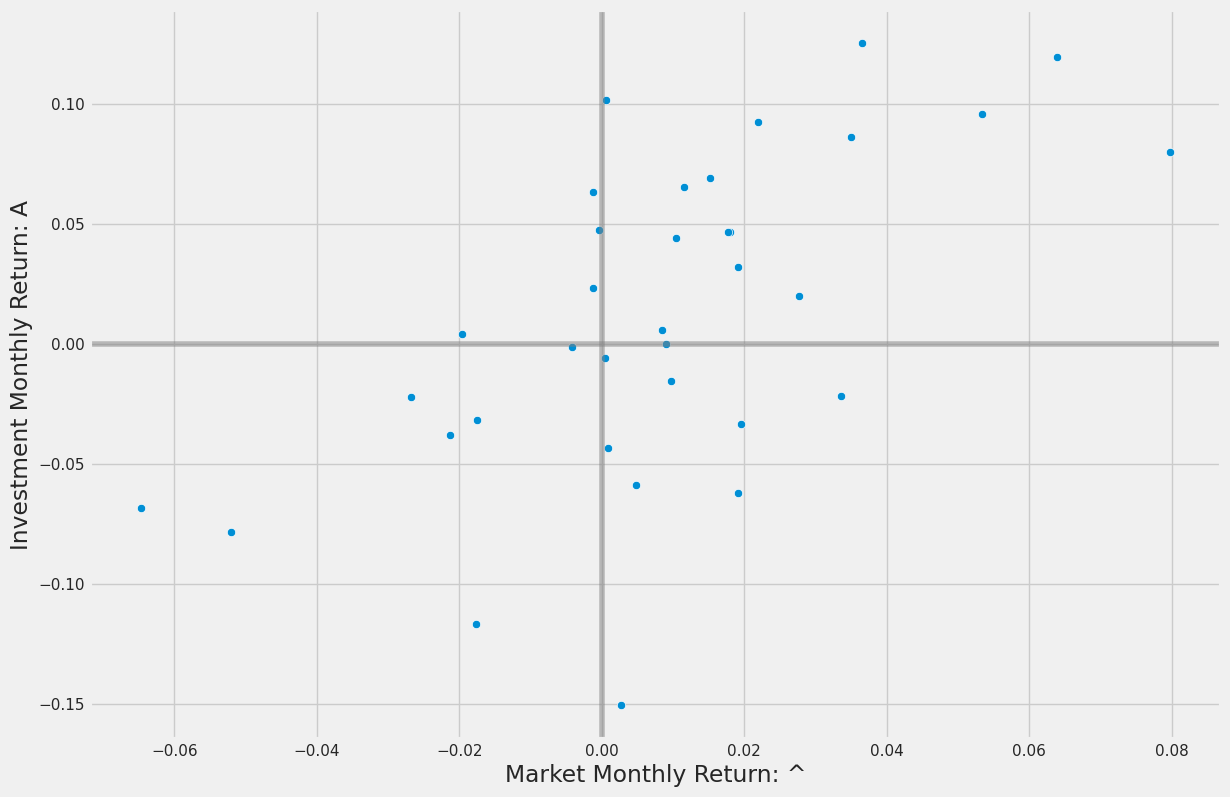

In [29]:
plt.figure(figsize = (13,9))

plt.axvline(0, color='grey', alpha = 0.5)
plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Inv_Ret', x = 'Markt_Ret', data = data)
plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
plt.ylabel('Investment Monthly Return: {}'.format(stock_a[0]))
plt.show()

We now compute $\beta$ according to the CAPM formula:

In [30]:
beta_form = (data[['Inv_Ret','Markt_Ret']].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1]
print('Beta from CAPM formula: ',beta_form.round(4))

Beta from CAPM formula:  1.4373


Now, with our returns data, we make a linear regression and compute $\alpha$ and $\beta$:

In [31]:
beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['Inv_Ret'] ,deg = 1)
print('Beta from Linear Regression: ',beta_reg.round(4))
print('Alpha: ', alpha.round(3))

Beta from Linear Regression:  1.4373
Alpha:  0.0


Finally, we plot our returns scatter plot along with the CAPM line:

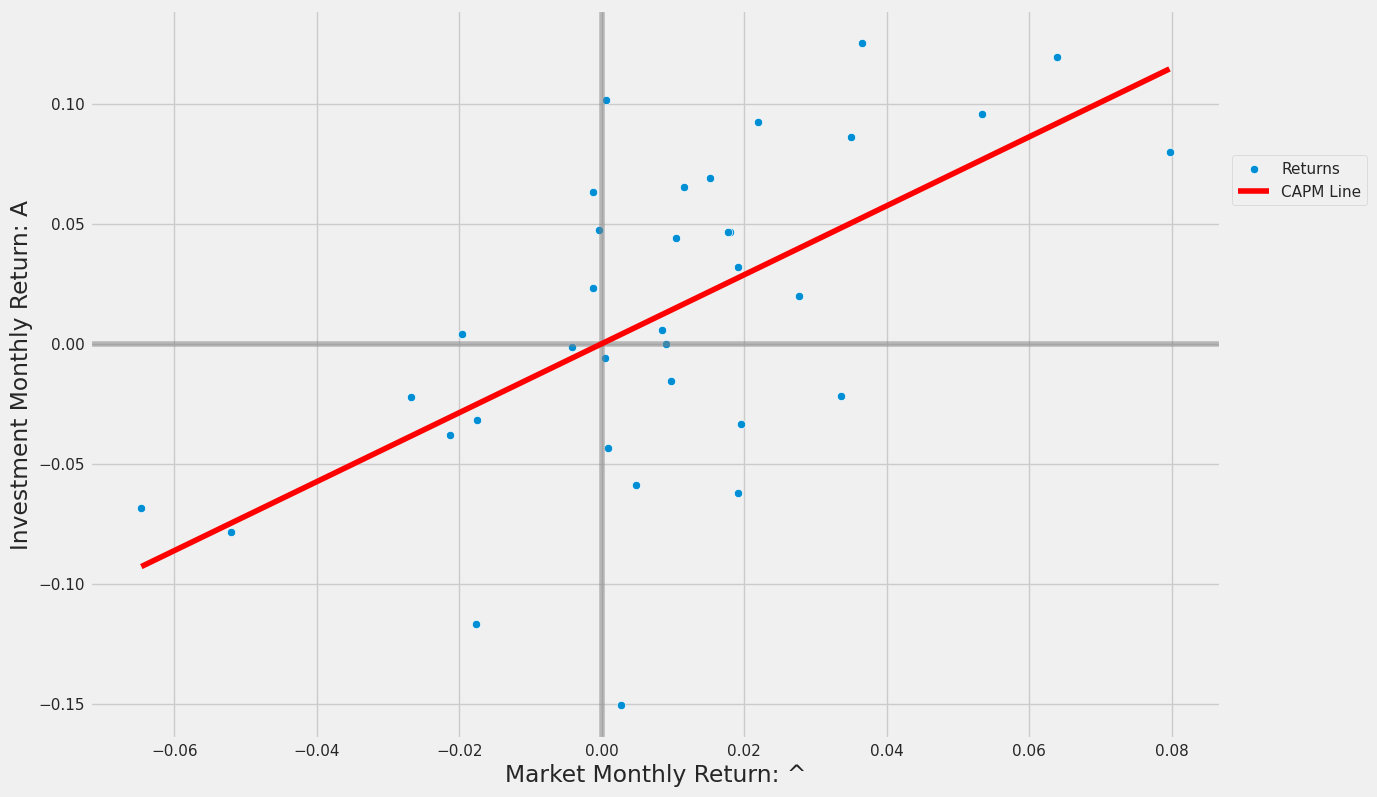

In [32]:
plt.figure(figsize = (13,9))

plt.axvline(0, color='grey', alpha = 0.5)
plt.axhline(0, color='grey', alpha = 0.5)

sns.scatterplot(y = 'Inv_Ret', x = 'Markt_Ret', data = data, label = 'Returns')
sns.lineplot(x = data['Markt_Ret'], y = alpha + data['Markt_Ret']*beta_reg, color = 'red', label = 'CAPM Line')



plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
plt.ylabel('Investment Monthly Return: {}'.format(stock_a[0]))

plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

plt.show()

In [33]:
data.to_csv('apple.csv', index=True)

We now define a single function that gives us $\alpha$, $\beta$ and the corresponding plot.

In [34]:
def CAPM(stock_a,stock_m,start, end):

    #data_a = pdr.get_data_yahoo(stock_a, start=start, end=end)['Adj Close']
    #data_m = pdr.get_data_yahoo(stock_m, start=start, end=end)['Adj Close']

    data_a = yf.download(stock_a, start=start, end=end)['Adj Close']
    data_m = yf.download(stock_m, start=start, end=end)['Adj Close']

    M_stock_a = data_a.resample('M').last()
    M_stock_m = data_m.resample('M').last()

    data = pd.DataFrame({'Inv_Close':M_stock_a, 'Markt_Close': M_stock_m})
    data[['Inv_Ret','Markt_Ret']] = np.log(data[['Inv_Close','Markt_Close']]/data[['Inv_Close','Markt_Close']].shift(1))
    data.dropna(inplace=True)

    beta_form = (data[['Inv_Ret','Markt_Ret']].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1]
    beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['Inv_Ret'] ,deg = 1)



    print('\n')
    print(20*'==')
    print('Beta from formula: ',beta_form.round(4))
    print('Beta from Linear Regression: ',beta_reg.round(4))
    print('Alpha: ', alpha.round(3))
    print(20*'==')

    plt.figure(figsize = (13,9))

    plt.axvline(0, color='grey', alpha = 0.5)
    plt.axhline(0, color='grey', alpha = 0.5)

    sns.scatterplot(y = 'Inv_Ret', x = 'Markt_Ret', data = data, label = 'Returns')
    sns.lineplot(x = data['Markt_Ret'], y = alpha + data['Markt_Ret']*beta_reg, color = 'red', label = 'CAPM Line')

    plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
    plt.ylabel('Investment Monthly Return: {}'.format(stock_a[0]))
    plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

    plt.show()



We try with Apple:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-34-b02cd72278b7>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  M_stock_a = data_a.resample('M').last()
<ipython-input-34-b02cd72278b7>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  M_stock_m = data_m.resample('M').last()




Beta from formula:  1.3947
Beta from Linear Regression:  1.3947
Alpha:  0.004


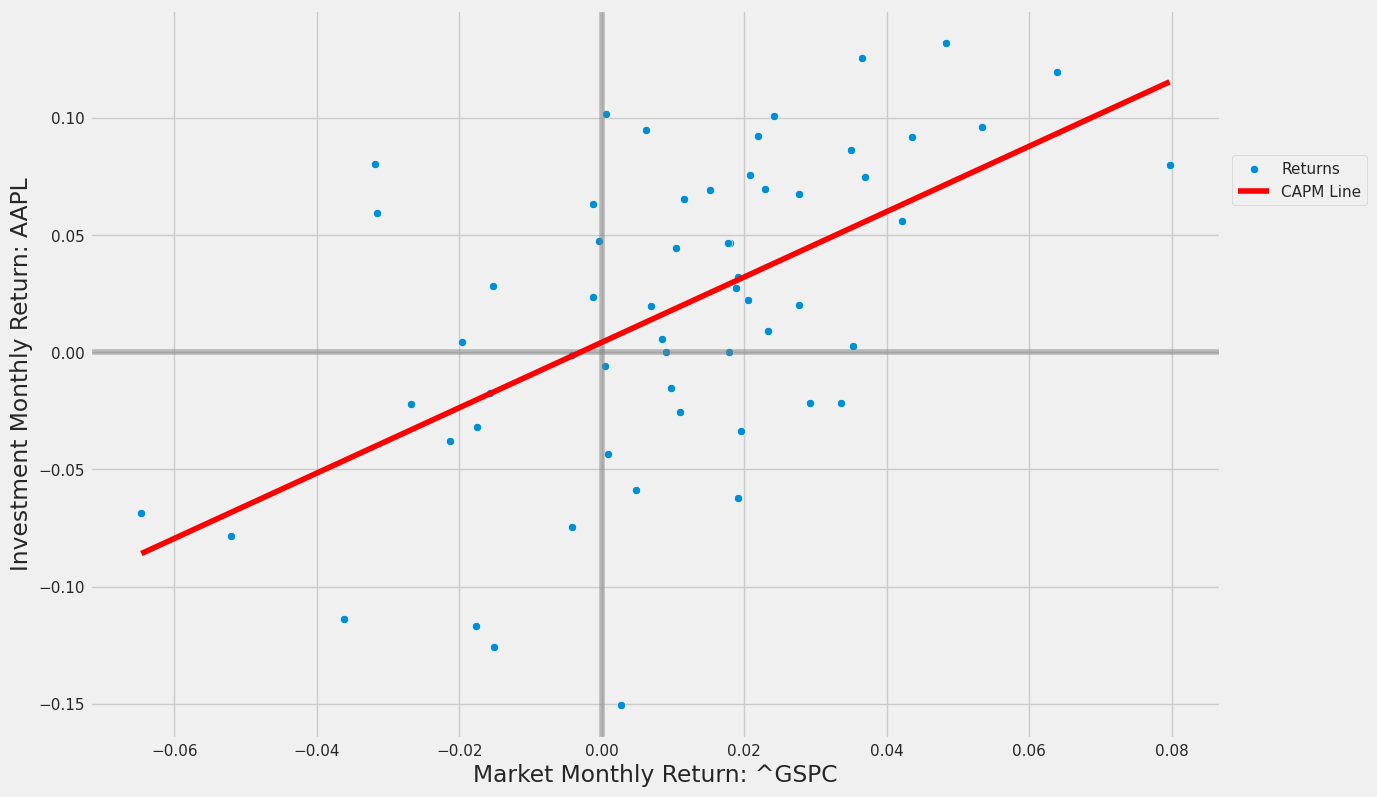

In [35]:
stock_a =['AAPL']
stock_m = ['^GSPC']

start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')

CAPM(stock_a,stock_m,start, end)

We try with General Electric:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-34-b02cd72278b7>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  M_stock_a = data_a.resample('M').last()
<ipython-input-34-b02cd72278b7>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  M_stock_m = data_m.resample('M').last()




Beta from formula:  1.0243
Beta from Linear Regression:  1.0243
Alpha:  -0.011


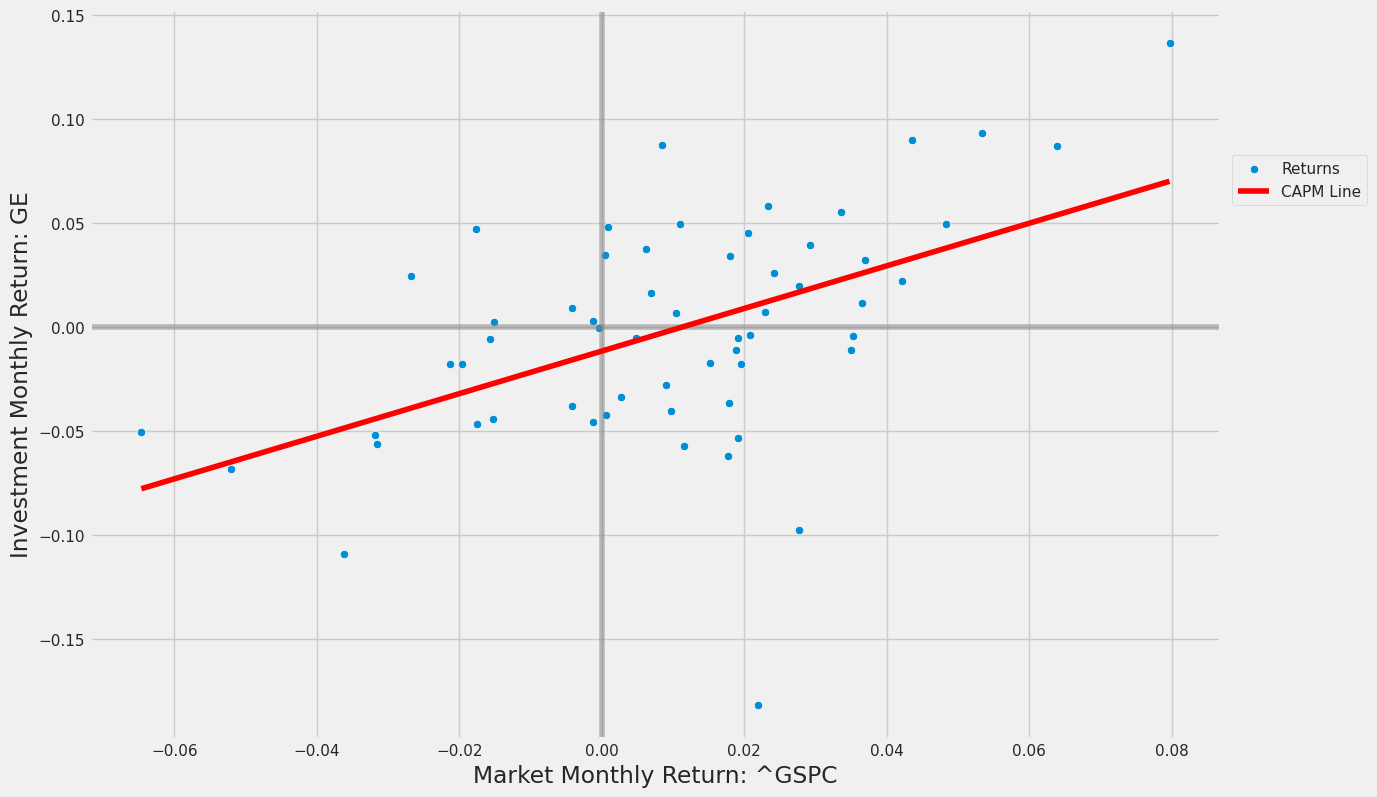

In [36]:
stock_a =['GE']
stock_m = ['^GSPC']

start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')

CAPM(stock_a,stock_m,start, end)

We try with Advanced Micro Devices:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-34-b02cd72278b7>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  M_stock_a = data_a.resample('M').last()
<ipython-input-34-b02cd72278b7>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  M_stock_m = data_m.resample('M').last()




Beta from formula:  2.3585
Beta from Linear Regression:  2.3585
Alpha:  0.0


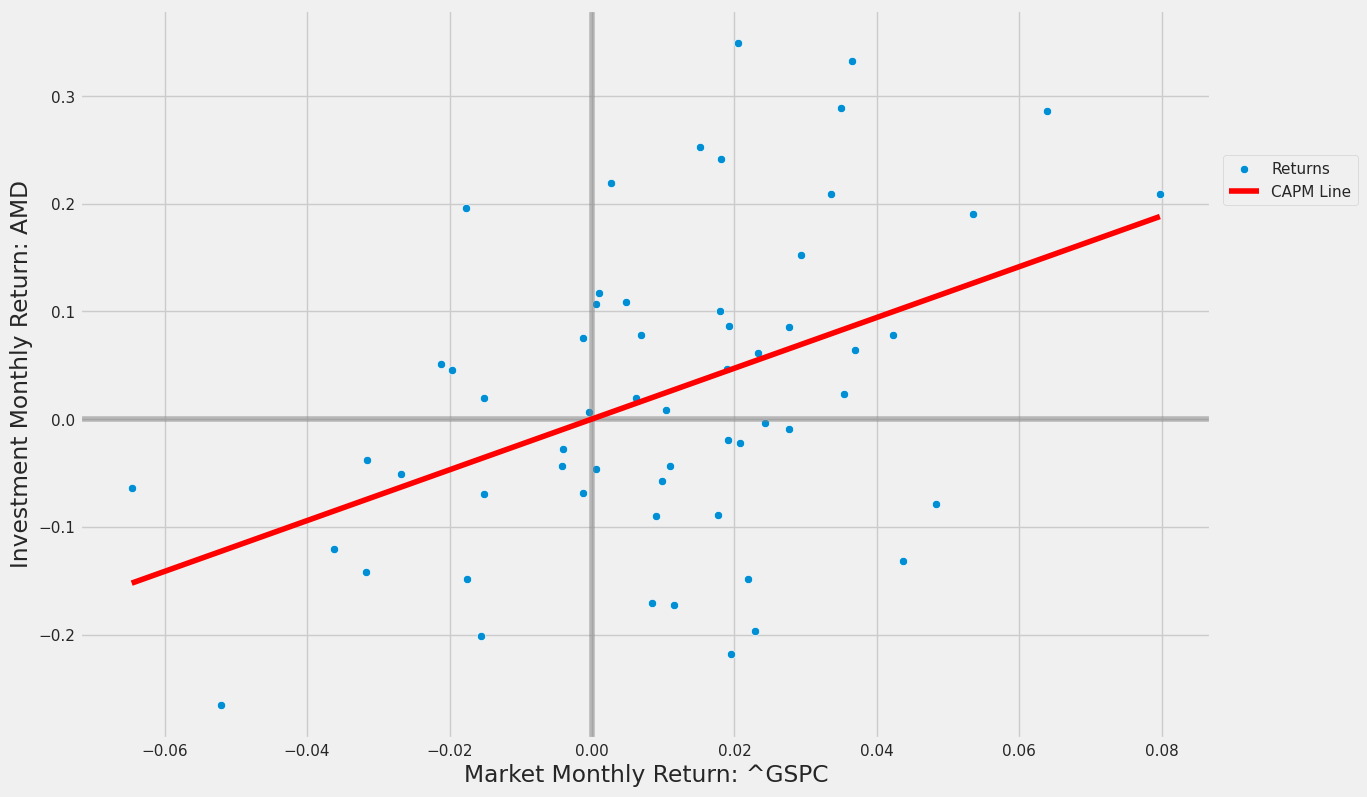

In [37]:
stock_a =['AMD']
stock_m = ['^GSPC']

start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')

CAPM(stock_a,stock_m,start, end)

Just for completeness, we can construct a similar function, now taking into consideration daily instead of monthly returns.

In [38]:
def CAPM_daily(stock_a,stock_m,start, end):

    data_a = yf.download(stock_a, start=start, end=end)['Adj Close']
    data_m = yf.download(stock_m, start=start, end=end)['Adj Close']

    #data_a = pdr.get_data_yahoo(stock_a, start=start, end=end)['Adj Close']
    #data_m = pdr.get_data_yahoo(stock_m, start=start, end=end)['Adj Close']

    #M_stock_a = data_a.resample('M').last()
    #M_stock_m = data_m.resample('M').last()

    data = pd.DataFrame({'Inv_Close':data_a, 'Markt_Close': data_m})
    data[['Inv_Ret','Markt_Ret']] = np.log(data[['Inv_Close','Markt_Close']]/data[['Inv_Close','Markt_Close']].shift(1))
    data.dropna(inplace=True)

    beta_form = (data[['Inv_Ret','Markt_Ret']].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1]
    beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['Inv_Ret'] ,deg = 1)



    print('\n')
    print(20*'==')
    print('Beta from formula: ',beta_form.round(4))
    print('Beta from Linear Regression: ',beta_reg.round(4))
    print('Alpha: ', alpha.round(3))
    print(20*'==')

    plt.figure(figsize = (13,9))

    plt.axvline(0, color='grey', alpha = 0.5)
    plt.axhline(0, color='grey', alpha = 0.5)

    sns.scatterplot(y = 'Inv_Ret', x = 'Markt_Ret', data = data, label = 'Returns')
    sns.lineplot(x = data['Markt_Ret'], y = alpha + data['Markt_Ret']*beta_reg, color = 'red', label = 'CAPM Line')

    plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
    plt.ylabel('Investment Monthly Return: {}'.format(stock_a[0]))
    plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

    plt.show()

We try again with Apple:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed




Beta from formula:  0.9769
Beta from Linear Regression:  0.9769
Alpha:  0.0


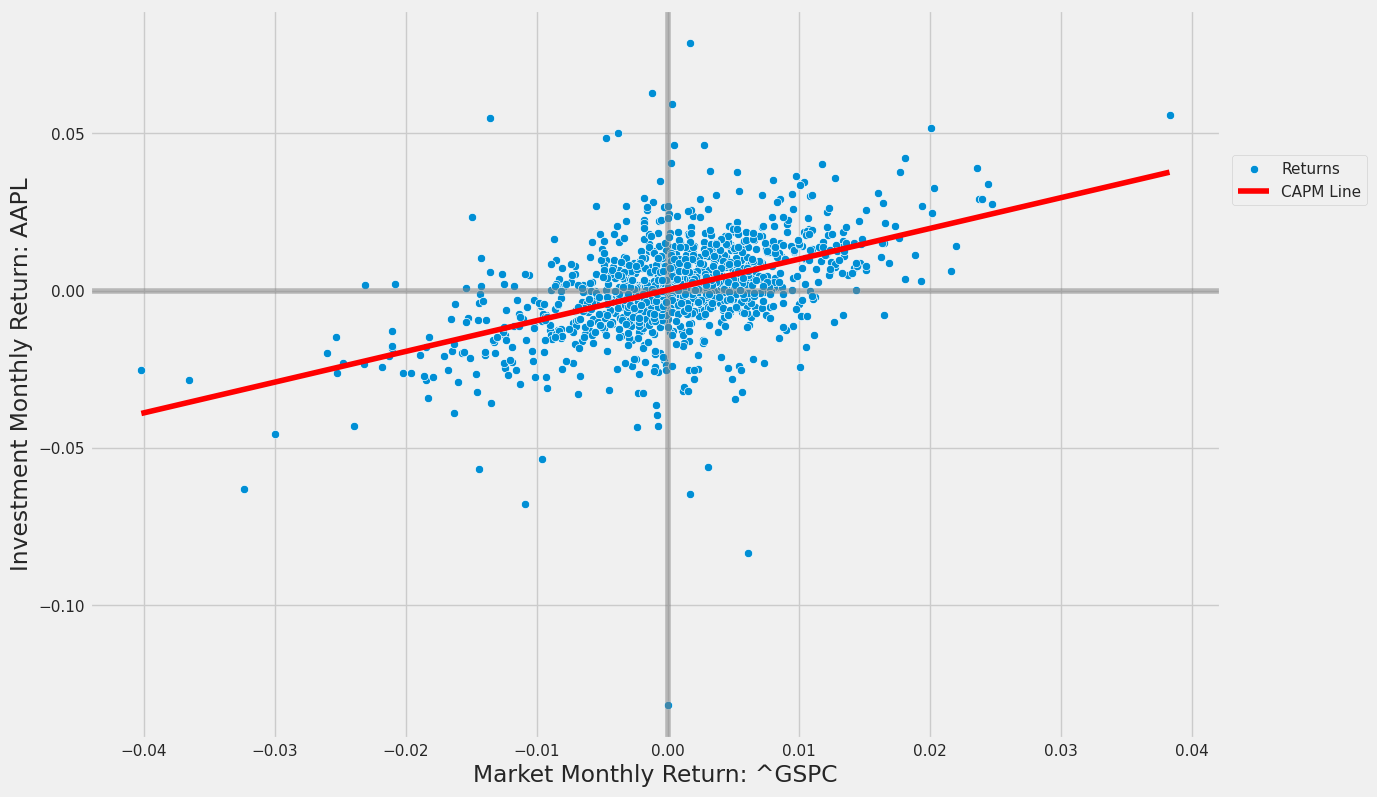

In [39]:
stock_a =['AAPL']
stock_m = ['^GSPC']

start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')

CAPM_daily(stock_a,stock_m,start, end)

From this, we do notice a quantitative change in the estimation of Beta.